# Individual assignment

The assignment focuses on:

1.   Describing variables;
2.   Visualising variables of interest;
3.   Running a simple regression and interpret its results; and
4.   Discussing what identification strategy would be suitable for solving the endogeneity problem.



## INSTRUCTIONS: PLEASE READ CAREFULLY AND FOLLOW

*   Please choose **one** dataset from the tile of Individual Assignment (not datasets for tutorials).
*   Please feel free to add as many code blocks and text blocks as you need.
*   Please **clearly comment** your code (what does each line of code produce).
*   Please do **NOT** remove any text blocks provided. Otherwise, you may get a penalty of 10 points.

### Part I

This section has a maximum of **10 points**. To earn the maximum number of points, you should answer the following three questions.

* Name the dataset you choose.

* Discuss the units of measurement of all the variables.

* List the type of variables of all the variables.



**Name the dataset you choose.?**

I am chosing gapminder dataset for my assignment

In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('/content/gapminder.xlsx')
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [3]:
print(df.dtypes)

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object


**Discuss the units of measurement of all the variables.**

The gapminder data contains data on life expectancy and GDP per capita by country and year.
- country= Name of country (Object)
- continent= The continent the country is in (Object)
- year= Thea year data was collected (Integer)
- lifeExp= Life expectancy at birth,in years (Float)
- pop= Population (Integer)
- gdpPercap= GDP per capita( US$, inflation adjusted) (Float)


In [4]:
continuous = [col for col in df if df[col].dtype == 'float64']
discrete = [col for col in df if df[col].dtype == 'int64']
categorical= [col for col in df if df[col].dtype=='object']

print("Continuous Variables:", continuous)
print("Discrete Variables:", discrete)
print('Categorical:',categorical)

Continuous Variables: ['lifeExp', 'gdpPercap']
Discrete Variables: ['year', 'pop']
Categorical: ['country', 'continent']


In [5]:
df.shape

(1704, 6)

**List the type of variables of all the variables**

Continuous Variables: lifeExp, gdpPercap

Discrete Variables: year, pop

Categorical: country, continent

### Part II

This section has a maximum of **25 points**. To earn the maximum number of points, you need to create 2 graphs of 2 variables of interest using matplotlib and/or seaborn. One of the two variables should be a continuous variable and the other is a categorical/ ordinal/ binary variable. Both graphs should have title, legend, axis labels, and figure caption.


In [6]:
# importing various libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


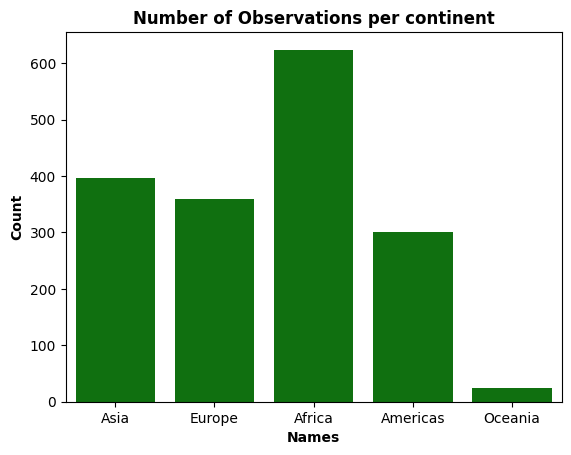

In [7]:
# Chart 1
sns.countplot(df, x='continent',color='green')
plt.xlabel('Names',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Number of Observations per continent',fontweight='bold')
plt.show()

# # this graph shows the distribution of data between given 5 continents

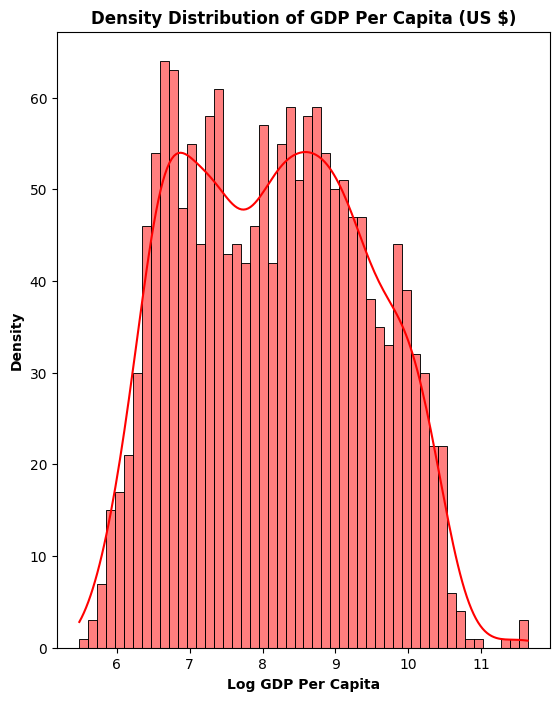

In [8]:
# Chart 2
# # Variables selected for this chart is consisted of GDP Per capita
df['log_gdpPercap'] = np.log(df['gdpPercap'])
plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
sns.histplot(df['log_gdpPercap'], bins=50, kde=True, color='Red')
plt.xlabel('Log GDP Per Capita',fontweight='bold')
plt.ylabel('Density',fontweight='bold')
plt.title('Density Distribution of GDP Per Capita (US $)',fontweight='bold')
plt.show()

### Part III

This section has a maximum of **25 points**. To earn the maximum number of points, present summary statistics for the variables used in the analysis in a table (mean, standard deviation, minimum, maximum, number of observations) and include a summary table with them. All categorical variables, variables that are not continuous (e.g., race, gender), need to be presented by category.

In addition, please include a short text explaining 2-3 interesting observations from the summary statistics.

Summary statistics of categorical variables:

In [9]:
print(df.describe(include=['object']))

            country continent
count          1704      1704
unique          142         5
top     Afghanistan    Africa
freq             12       624


In [10]:
#  Number of observations for each country
country_counts = df['country'].value_counts()
country_percentages = df['country'].value_counts(normalize=True) * 100
summary_table = pd.DataFrame({'Count': country_counts, 'Percentage': country_percentages})
print(summary_table)

                   Count  Percentage
country                             
Afghanistan           12    0.704225
Pakistan              12    0.704225
New Zealand           12    0.704225
Nicaragua             12    0.704225
Niger                 12    0.704225
...                  ...         ...
Eritrea               12    0.704225
Equatorial Guinea     12    0.704225
El Salvador           12    0.704225
Egypt                 12    0.704225
Zimbabwe              12    0.704225

[142 rows x 2 columns]


In [11]:
#  Number of observations for each continent
continent_counts = df['continent'].value_counts()
continent_percentages = df['continent'].value_counts(normalize=True) * 100
summary_table = pd.DataFrame({'Count': continent_counts, 'Percentage': continent_percentages})
print(summary_table)

           Count  Percentage
continent                   
Africa       624   36.619718
Asia         396   23.239437
Europe       360   21.126761
Americas     300   17.605634
Oceania       24    1.408451


Summary statistics of continuous variables:

In [12]:
df.describe()

,year,lifeExp,pop,gdpPercap,log_gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081,8.158791
std,17.26533,12.917107,1.061579e+08,9857.454543,1.241164
min,1952.00000,23.599000,6.001100e+04,241.165876,5.485485
25%,1965.75000,48.198000,2.793664e+06,1202.060309,7.091792
50%,1979.50000,60.712500,7.023596e+06,3531.846988,8.169576
75%,1993.25000,70.845500,1.958522e+07,9325.462346,9.140504
max,2007.00000,82.603000,1.318683e+09,113523.132900,11.639762


- The GDP per capita ranges from USD 241.16 to  USD 113,523.13, showing a huge gap between the poorest and richest regions or countries

- The population varies widely, from 60,011 people to 1.31 billion. The average population is 29.6 million, but the standard deviation is very high.

- The median life expectancy (60.71 years) is higher than the 25th percentile (48.2 years), showing that most countries have improved their life expectancy over time.

### Part IV

This section has a maximum **30 points**. To earn the maximum number of points, you need to answer the following questions:

Write the equation you estimate.

* A convincing discussion of what variables to control for is essential. Are your results causal or not? Discuss potential concerns with omitted variables etc along with the consequences of those problems.

* Present your results in a table that includes coefficients, standard error, R-squared and number of observations. The control variables should be added one by one, and the results should be reported in separate columns (number of observations should be constant)

* Write about the magnitude and interpretations of your coefficients. Are they statistically significant (includes significance levels in tables)? Do they have or not the expected sign (this may indicate a specification problem, for example, omitted variables)?

**A convincing discussion of what variables to control for is essential. Are your results causal or not? Discuss potential concerns with omitted variables etc along with the consequences of those problems.**


When examining the connection between GDP per capita and life expectancy, it is important to account for critical factors like education, population density, and government policies. These elements impact both economic development and health outcomes, helping minimize the risk of omitted variable bias.

The findings might not be fully causal, as there could be reverse causality (where longer life expectancy drives economic growth) or omitted variables (such as political stability influencing both GDP and health). Failing to consider these factors could lead to skewed estimates, distorting the actual relationship. Employing techniques like instrumental variables or fixed effects models can help mitigate these concerns.

**Present your results in a table that includes coefficients, standard error, R-squared and number of observations. The control variables should be added one by one, and the results should be reported in separate columns (number of observations should be constant)**

In [25]:
# finding regression summaries and importing libraries
!pip install statsmodels
import statsmodels.formula.api as sm

df['log_lifeExp'] = np.log(df['lifeExp'])
df['log_pop']=np.log(df['pop'])


Regression1 = sm.ols(formula = 'log_lifeExp ~ log_gdpPercap', data = df).fit()
print(Regression1.summary())

Regression2 = sm.ols(formula = 'log_lifeExp ~ log_gdpPercap + log_pop', data = df).fit()
print(Regression2.summary())

                            OLS Regression Results                            
Dep. Variable:            log_lifeExp   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     2100.
Date:                Thu, 13 Feb 2025   Prob (F-statistic):          2.50e-299
Time:                        21:41:07   Log-Likelihood:                 1678.6
No. Observations:                1704   AIC:                            -3353.
Df Residuals:                    1702   BIC:                            -3342.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.7616      0.015   -120.938

**Write about the magnitude and interpretations of your coefficients. Are they statistically significant (includes significance levels in tables)? Do they have or not the expected sign (this may indicate a specification problem, for example, omitted variables)?**

- Here R-squared is 55.2% and when 1 variable is added to control variable there is slight increase by 0.2% in R-squared.

- The magnitude of the coefficients indicates the strength of the relationship between GDP per capita and life expectancy. A positive coefficient suggests that higher income levels are associated with increased longevity. Statistical significance, measured by p-values and confidence intervals, determines whether the effect is likely real or due to chance.

- If coefficients have unexpected signs (e.g., negative GDP effect on life expectancy), it may indicate omitted variable bias, measurement errors, or model misspecification. Including additional control variables and checking robustness through alternative specifications can improve reliability. Significance levels in tables (e.g., p < 0.05) confirm whether results are meaningful.



### Part V

This section has a maximum of **10 points**. To earn the maximum number of points, discuss potential causes of the endogeneity problem in your regression.

**Defining Endogenity**

Endogeneity refers to a situation in regression analysis where an independent variable is correlated with the error term. This violates the assumption of exogeneity in ordinary least squares (OLS) regression, leading to biased and inconsistent parameter estimates.


**Potential causes of Endogeneity**

Endogeneity arises in the regression due to the following factors:

Omitted Variable Bias: Excluding key factors like education, governance, income, climate, healthcare quality distorts the true relationships between variables.

Simultaneity (Reverse Causality): GDP per capita can influence life expectancy and population growth, reversing the expected causal direction.

Selection Bias: Non-representative data (e.g., wealthier countries with better data systems) skews the results.

Consequences of Endogeneity:

- Biased estimates- The estimated coefficients do not reflect the true causal relationship, leading to incorrect conclusions.

- Inconsistent coefficient estimates- As the sample size increases, the estimates do not converge to the true parameter value, making predictions unreliable.

- Poor predictive accuracy- In finance and economics, biased models can lead to wrong decisions about risk assessment, investment strategies, or policy implementations.

Mitigation Strategies:

- Use instrumental variables (e.g., historical factors)- Use instruments that are correlated with the endogenous variable but not with the error term.

- Lagged Variables- Using past values to reduce simultaneity.




---
**Thank You**

---


